In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1]:
# 1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных,
    #число пропущенных значений и описательную статистику.

# 2. Какие значения находятся в колонке transaction? 
#Сколько наблюдений относятся к тому или иному уровню? 
#Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

# 3. Сколько транзакций завершились ошибкой?

# 4. Сколько успешных транзакций осуществил каждый из пользователей?
#Постройте гистограмму распределения числа успешных транзакций.

# 6. Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
#Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей,
#строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

# 7.И зучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
#Если в данные закралась ошибка, исправьте её и сохраните правильное число минут,
#прошедших с начала дня, в колонку true_minute.

In [5]:
df = pd.read_csv('transaction_data.csv')


In [6]:
df.shape # размер колонки

(5315, 3)

In [9]:
df.isna().sum() # количество пропущенных значений

date           0
name           0
transaction    0
dtype: int64

In [10]:
df.drop_duplicates().shape # Удалить дубликаты

(5315, 3)

In [11]:
df.dtypes # типы переменных

date           object
name           object
transaction    object
dtype: object

In [14]:
df.describe() # описательная статистика

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


## 2. Какие значения находятся в колонке transaction? 
Сколько наблюдений относятся к тому или иному уровню? 
Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [ ]:
df.transaction.

In [21]:
values_of_transaction = df.transaction.value_counts()
values_of_transaction

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:ylabel='transaction'>

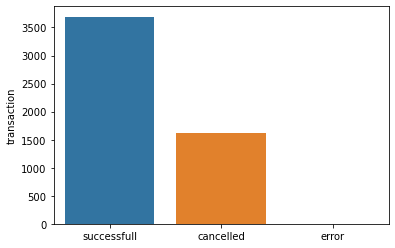

In [27]:
sns.barplot(x=values_of_transaction.index , y=values_of_transaction)

## 3.Сколько транзакций завершились ошибкой?

In [31]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [34]:
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


##  4. Сколько успешных транзакций осуществил каждый из пользователей?
#Постройте гистограмму распределения числа успешных транзакций.

In [41]:
successfull_transaction = df.query('transaction == "successfull"').groupby('name').agg({'transaction' :'count'})

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

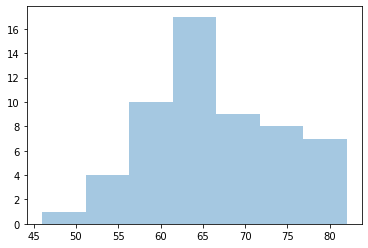

In [44]:
sns.distplot(successfull_transaction, kde=False)

In [46]:
successfull_transaction.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


## 6. Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [73]:
new_df = pd.read_csv('transaction_data_updated.csv')

### Вариант 1

In [69]:
transaction_in_minute = new_df.groupby(['name','minute'],as_index=False) \
                        .agg({'transaction': 'count'}) \
                        .rename(columns={'transaction': 'number'})


In [72]:
user_vs_minute_pivot = transaction_in_minute.pivot(index='minute',
                                                   columns='name',
                                                   values='number')

In [76]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0) #or user_vs_minute_pivot.fillna(0, inplace = True)

### Вариант 2

In [83]:
user_vs_minute_pivot_2 = new_df.pivot_table(index='minute',
                                            columns='name',
                                            values='transaction', 
                                            aggfunc='count', 
                                            fill_value = 0)

##  7. Изучите представленный график. 
Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут,
прошедших с начала дня, в колонку true_minute

<AxesSubplot:xlabel='minute'>

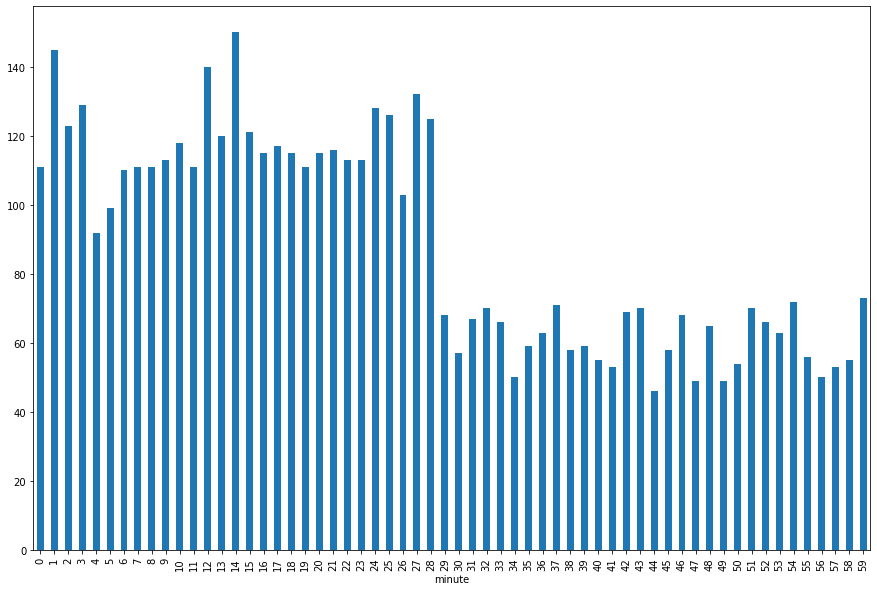

In [90]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(15,10)) #сумма по строке

In [101]:
new_df.date.max()  # время обрывалось на 59, на самом деле было 90 минут

'2020-03-02 01:29:05'

In [ ]:
true_minute

###  Исправить ошибку

In [104]:
new_df['date'] = pd.to_datetime(new_df.date) # перевод колонки дата в формат даты

In [103]:
new_df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [109]:
new_df['true_minute'] = new_df.date.dt.minute + new_df.date.dt.hour *60 # создать колонку с правильными минутами 

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

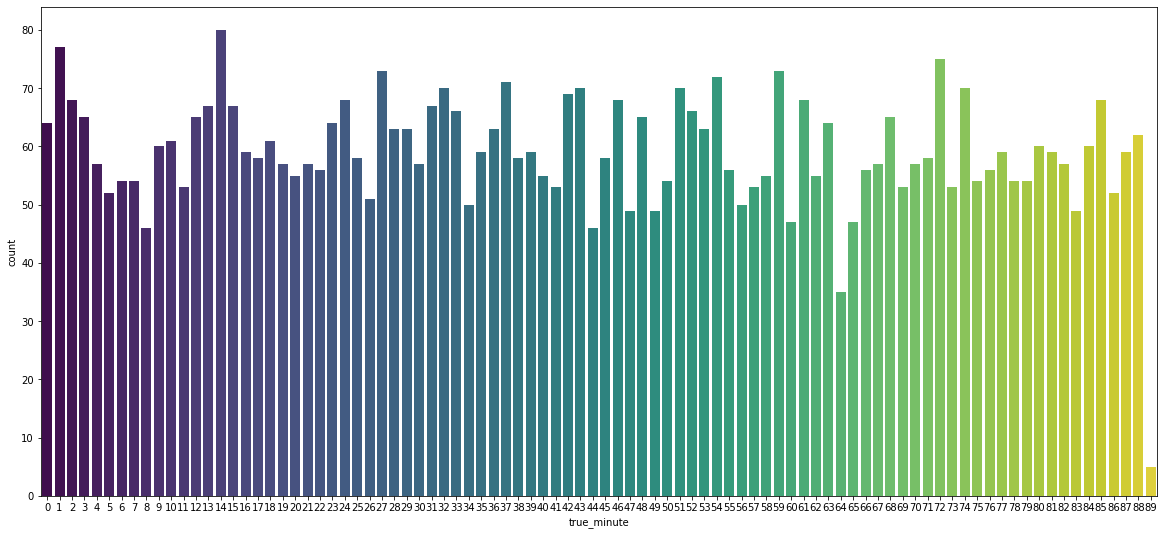

In [126]:
plt.figure(figsize=(20,9))
sns.countplot(new_df['true_minute'], palette='viridis')